In [1]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import pickle
import numpy as np
import os, sys
import seaborn as sns
training_summary = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/summaries.npz")
training_summary1 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/26Onwards/summaries.npz")
training_summary2 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/summaries.npz")


/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
loss_means = np.mean(training_summary['acc_loss'], axis=1)
loss_means1 = np.mean(training_summary1['acc_loss'], axis=1)
loss_means2 = np.mean(training_summary2['acc_loss'], axis=1)

loss_mean=np.append(loss_means,loss_means1)
print(len(loss_mean))

52


In [3]:
[key for key in training_summary1.keys()]

['epoch',
 'acc_loss',
 'acc_lr',
 'lr',
 'train_time',
 'train_loss',
 'valid_time',
 'valid_loss',
 'valid_acc']

In [7]:
print(training_summary2['epoch'])
epochs = np.arange(0,76,1)
#print(epochs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [8]:
loss_means=np.append(training_summary['train_loss'],training_summary1['train_loss'])
loss_means1=np.append(loss_means,training_summary2['train_loss'])#,training_summary1['train_loss'])
print(len(loss_means1))
loss_means_v=np.append(training_summary['valid_loss'],training_summary1['valid_loss'])
loss_means1_v=np.append(loss_means_v,training_summary2['valid_loss'])#,validing_summary1['valid_loss'])

76


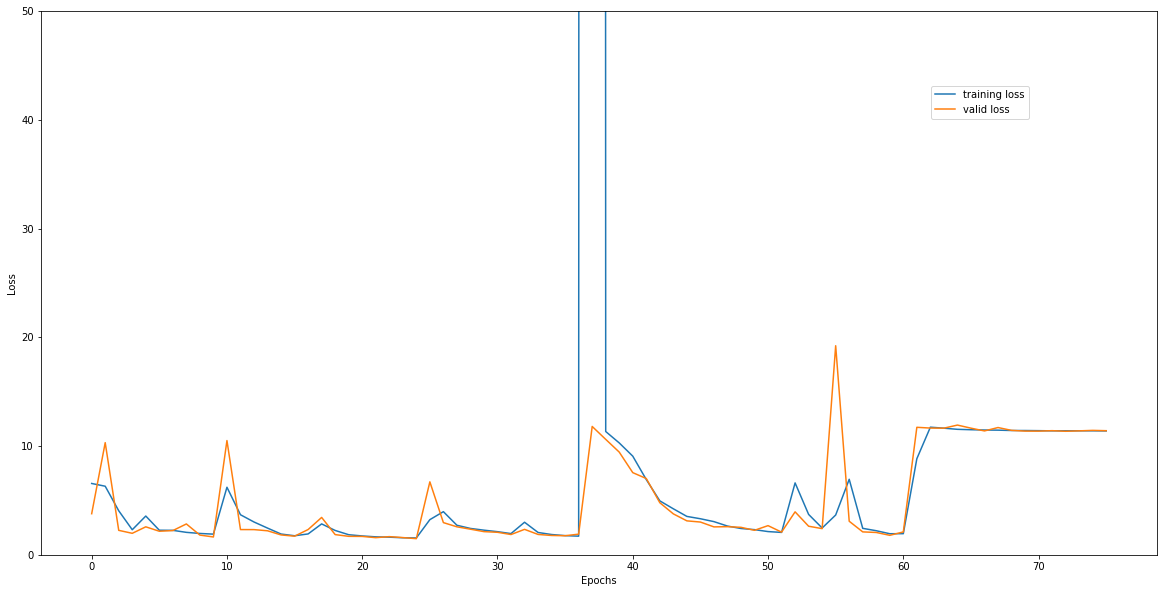

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(epochs,loss_means1, label='training loss')
ax.plot(epochs,loss_means1_v,label='valid loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_ylim(0,50)
fig.legend(loc=(0.8,0.8))
fig.show()
fig.savefig("DRN_Nosemi_Tar-trueE_bestArch_With-1MStats-75Epochs_AfterRescaling.png")

In [ ]:
import pickle
import numpy as np



pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/pred_tb.pickle"
predPickle = open(pred_v2, "rb")
print(predPickle)
preds_trueEn = np.asarray(pickle.load(predPickle))
#print(preds[0])

In [ ]:
import awkward
trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/trueE.pickle"
trueEnPickle = open(trueEn,"rb")
trueEn_pkl = np.asarray(pickle.load(trueEnPickle))
#fig, ax = plt.subplots(figsize=(15,10))
#ax.hist(preds_trueEn, bins =1000)
#ax.set_xlabel('Predicted Energy')
#fig.show()
#print(trueEn_pkl[0])
print(np.max(trueEn_pkl))
print(np.max(preds_trueEn))
print(np.min(trueEn_pkl))
print(np.min(preds_trueEn))
print(len(preds_trueEn))
print(len(trueEn_pkl))
plt.hist2d(preds_trueEn, trueEn_pkl)

In [ ]:
valid_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/all_valididx.pickle"
train_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/all_trainidx.pickle"

valid_idx_f = open(valid_idx_file,"rb")
valid_idx = np.asarray(pickle.load(valid_idx_f))
print(len(valid_idx))

train_idx_f = open(train_idx_file,"rb")
train_idx = np.asarray(pickle.load(train_idx_f))
print(len(train_idx))
print(preds_trueEn[train_idx[1]])
print(trueEn_pkl[train_idx[1]])
print(preds_trueEn[valid_idx[1]])
print(trueEn_pkl[valid_idx[1]])
valid_trueEn_All=[]
valid_predEn_All=[]
##temp lists
valid_trueEn_20=[]
valid_predEn_20=[]
valid_trueEn_50=[]
valid_predEn_50=[]
valid_trueEn_80=[]
valid_predEn_80=[]
valid_trueEn_100=[]
valid_predEn_100=[]
valid_trueEn_120=[]
valid_predEn_120=[]
valid_trueEn_200=[]
valid_predEn_200=[]
valid_trueEn_250=[]
valid_predEn_250=[]
valid_trueEn_300=[]
valid_predEn_300=[]

train_trueEn_All=[]
train_predEn_All=[]
for i in range(len(valid_idx)):
    valid_trueEn=(trueEn_pkl[valid_idx[i]])
    valid_predEn=(preds_trueEn[valid_idx[i]])
    if(valid_trueEn>=18 and valid_trueEn<=22):
        valid_trueEn_20.append(valid_trueEn)
        valid_predEn_20.append(valid_predEn)
    elif(valid_trueEn>=48 and valid_trueEn<=52):
        valid_trueEn_50.append(valid_trueEn)
        valid_predEn_50.append(valid_predEn)
    elif(valid_trueEn>=78 and valid_trueEn<=82):
        valid_trueEn_80.append(valid_trueEn)
        valid_predEn_80.append(valid_predEn)
    elif(valid_trueEn>=98 and valid_trueEn<=102):
        valid_trueEn_100.append(valid_trueEn)
        valid_predEn_100.append(valid_predEn)
    elif(valid_trueEn>=118 and valid_trueEn<=122):
        valid_trueEn_120.append(valid_trueEn)
        valid_predEn_120.append(valid_predEn)
    elif(valid_trueEn>=198 and valid_trueEn<=202):
        valid_trueEn_200.append(valid_trueEn)
        valid_predEn_200.append(valid_predEn)
    elif(valid_trueEn>=248 and valid_trueEn<=252):
        valid_trueEn_250.append(valid_trueEn)
        valid_predEn_250.append(valid_predEn)
    elif(valid_trueEn>=298 and valid_trueEn<=302):
        valid_trueEn_300.append(valid_trueEn)
        valid_predEn_300.append(valid_predEn)
valid_trueEn_All.append(valid_trueEn_20)
valid_trueEn_All.append(valid_trueEn_50)
valid_trueEn_All.append(valid_trueEn_80)
valid_trueEn_All.append(valid_trueEn_100)
valid_trueEn_All.append(valid_trueEn_120)
valid_trueEn_All.append(valid_trueEn_200)
valid_trueEn_All.append(valid_trueEn_250)
valid_trueEn_All.append(valid_trueEn_300)

valid_predEn_All.append(valid_predEn_20)
valid_predEn_All.append(valid_predEn_50)
valid_predEn_All.append(valid_predEn_80)
valid_predEn_All.append(valid_predEn_100)
valid_predEn_All.append(valid_predEn_120)
valid_predEn_All.append(valid_predEn_200)
valid_predEn_All.append(valid_predEn_250)
valid_predEn_All.append(valid_predEn_300)
  
train_trueEn_20=[]
train_predEn_20=[]
train_trueEn_50=[]
train_predEn_50=[]
train_trueEn_80=[]
train_predEn_80=[]
train_trueEn_100=[]
train_predEn_100=[]
train_trueEn_120=[]
train_predEn_120=[]
train_trueEn_200=[]
train_predEn_200=[]
train_trueEn_250=[]
train_predEn_250=[]
train_trueEn_300=[]
train_predEn_300=[]

for i in range(len(train_idx)):
    train_trueEn=(trueEn_pkl[train_idx[i]])
    train_predEn=(preds_trueEn[train_idx[i]])
    if(train_trueEn>=18 and train_trueEn<=22):
        train_trueEn_20.append(train_trueEn)
        train_predEn_20.append(train_predEn)
    elif(train_trueEn>=48 and train_trueEn<=52):
        train_trueEn_50.append(train_trueEn)
        train_predEn_50.append(train_predEn)
    elif(train_trueEn>=78 and train_trueEn<=82):
        train_trueEn_80.append(train_trueEn)
        train_predEn_80.append(train_predEn)
    elif(train_trueEn>=98 and train_trueEn<=102):
        train_trueEn_100.append(train_trueEn)
        train_predEn_100.append(train_predEn)
    elif(train_trueEn>=118 and train_trueEn<=122):
        train_trueEn_120.append(train_trueEn)
        train_predEn_120.append(train_predEn)
    elif(train_trueEn>=198 and train_trueEn<=202):
        train_trueEn_200.append(train_trueEn)
        train_predEn_200.append(train_predEn)
    elif(train_trueEn>=248 and train_trueEn<=252):
        train_trueEn_250.append(train_trueEn)
        train_predEn_250.append(train_predEn)
    elif(train_trueEn>=298 and train_trueEn<=302):
        train_trueEn_300.append(train_trueEn)
        train_predEn_300.append(train_predEn)
train_trueEn_All.append(train_trueEn_20)
train_trueEn_All.append(train_trueEn_50)
train_trueEn_All.append(train_trueEn_80)
train_trueEn_All.append(train_trueEn_100)
train_trueEn_All.append(train_trueEn_120)
train_trueEn_All.append(train_trueEn_200)
train_trueEn_All.append(train_trueEn_250)
train_trueEn_All.append(train_trueEn_300)

train_predEn_All.append(train_predEn_20)
train_predEn_All.append(train_predEn_50)
train_predEn_All.append(train_predEn_80)
train_predEn_All.append(train_predEn_100)
train_predEn_All.append(train_predEn_120)
train_predEn_All.append(train_predEn_200)
train_predEn_All.append(train_predEn_250)
train_predEn_All.append(train_predEn_300)
    
    
np_valid_trueEn=np.array(valid_trueEn_All)
np_valid_predEn=np.array(valid_predEn_All)
np_train_trueEn=np.array(train_trueEn_All)
np_train_predEn=np.array(train_predEn_All)

In [ ]:
## reading tb data files
tb_valid_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_valididx.pickle"
tb_train_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_trainidx.pickle"
tb_pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/tb_data/pred_tb.pickle"
tb_predPickle = open(tb_pred_v2, "rb")
print(tb_predPickle)
tb_preds_trueEn = np.asarray(pickle.load(tb_predPickle))

tb_trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/trueE.pickle"
tb_trueEnPickle = open(tb_trueEn,"rb")
tb_trueEn_pkl = np.asarray(pickle.load(tb_trueEnPickle))
print(tb_trueEn_pkl[200000])

In [ ]:
tb_valid_idx_f = open(tb_valid_idx_file,"rb")
tb_valid_idx = np.asarray(pickle.load(tb_valid_idx_f))
print(len(tb_valid_idx))

tb_train_idx_f = open(tb_train_idx_file,"rb")
tb_train_idx = np.asarray(pickle.load(tb_train_idx_f))
print(len(tb_train_idx))
tb_trueEn_All=[]
tb_predEn_All=[]
##temp lists
tb_trueEn_20=[]
tb_predEn_20=[]
tb_trueEn_50=[]
tb_predEn_50=[]
tb_trueEn_80=[]
tb_predEn_80=[]
tb_trueEn_100=[]
tb_predEn_100=[]
tb_trueEn_120=[]
tb_predEn_120=[]
tb_trueEn_200=[]
tb_predEn_200=[]
tb_trueEn_250=[]
tb_predEn_250=[]
tb_trueEn_300=[]
tb_predEn_300=[]

for i in range(len(tb_valid_idx)):
    tb_trueEn=(tb_trueEn_pkl[tb_valid_idx[i]])
    tb_predEn=(tb_preds_trueEn[tb_valid_idx[i]])
    if(tb_trueEn==20):
        tb_trueEn_20.append(tb_trueEn)
        tb_predEn_20.append(tb_predEn)
        #print(tb_trueEn)
    elif(tb_trueEn==50):
        tb_trueEn_50.append(tb_trueEn)
        tb_predEn_50.append(tb_predEn)
    elif(tb_trueEn==80):
        tb_trueEn_80.append(tb_trueEn)
        tb_predEn_80.append(tb_predEn)
    elif(tb_trueEn==100):
        tb_trueEn_100.append(tb_trueEn)
        tb_predEn_100.append(tb_predEn)
    elif(tb_trueEn==120):
        tb_trueEn_120.append(tb_trueEn)
        tb_predEn_120.append(tb_predEn)
    elif(tb_trueEn==200):
        tb_trueEn_200.append(tb_trueEn)
        tb_predEn_200.append(tb_predEn)
    elif(tb_trueEn==250):
        tb_trueEn_250.append(tb_trueEn)
        tb_predEn_250.append(tb_predEn)
    elif(tb_trueEn==300):
        tb_trueEn_300.append(tb_trueEn)
        tb_predEn_300.append(tb_predEn)
for i in range(len(tb_train_idx)):
    tb_trueEn=(tb_trueEn_pkl[tb_train_idx[i]])
    tb_predEn=(tb_preds_trueEn[tb_train_idx[i]])
    if(tb_trueEn==20.0):
        tb_trueEn_20.append(tb_trueEn)
        tb_predEn_20.append(tb_predEn)
    elif(tb_trueEn==50):
        tb_trueEn_50.append(tb_trueEn)
        tb_predEn_50.append(tb_predEn)
    elif(tb_trueEn==80):
        tb_trueEn_80.append(tb_trueEn)
        tb_predEn_80.append(tb_predEn)
    elif(tb_trueEn==100):
        tb_trueEn_100.append(tb_trueEn)
        tb_predEn_100.append(tb_predEn)
    elif(tb_trueEn==120):
        tb_trueEn_120.append(tb_trueEn)
        tb_predEn_120.append(tb_predEn)
    elif(tb_trueEn==200):
        tb_trueEn_200.append(tb_trueEn)
        tb_predEn_200.append(tb_predEn)
    elif(tb_trueEn==250):
        tb_trueEn_250.append(tb_trueEn)
        tb_predEn_250.append(tb_predEn)
    elif(tb_trueEn==300):
        tb_trueEn_300.append(tb_trueEn)
        tb_predEn_300.append(tb_predEn)
print(len(tb_predEn_20))
tb_trueEn_All.append(tb_trueEn_20)
tb_trueEn_All.append(tb_trueEn_50)
tb_trueEn_All.append(tb_trueEn_80)
tb_trueEn_All.append(tb_trueEn_100)
tb_trueEn_All.append(tb_trueEn_120)
tb_trueEn_All.append(tb_trueEn_200)
tb_trueEn_All.append(tb_trueEn_250)
tb_trueEn_All.append(tb_trueEn_300)

tb_predEn_All.append(tb_predEn_20)
tb_predEn_All.append(tb_predEn_50)
tb_predEn_All.append(tb_predEn_80)
tb_predEn_All.append(tb_predEn_100)
tb_predEn_All.append(tb_predEn_120)
tb_predEn_All.append(tb_predEn_200)
tb_predEn_All.append(tb_predEn_250)
tb_predEn_All.append(tb_predEn_300)




In [ ]:
import ROOT
fout= ROOT.TFile("hist_DRn_noSemi_1Mstats_75epochs_withoutscalingMC.root", 'RECREATE')


In [ ]:
import ROOT
hist_pred_Valid=[]
hist_true_Valid=[]
hist_pred_Train=[]
hist_true_Train=[]
hist_predTrue_Valid=[]
hist_norm_predTrue_Valid=[]
hist_predTrue_Train=[]
hist_norm_predTrue_Train=[]
hist_pred_Tbdata=[]
hist_true_Tbdata=[]
hist_predTrue_Tbdata=[]
hist_norm_predTrue_Tbdata=[]

hist_pred_QGSP=[]
hist_true_QGSP=[]
hist_pred_FTFP=[]
hist_true_FTFP=[]
hist_predTrue_QGSP=[]
hist_norm_predTrue_QGSP=[]
hist_predTrue_FTFP=[]
hist_norm_predTrue_FTFP=[]
hist_2d= ROOT.TH2F("hist","true en vs pred en",300,0,400,300,0,400)
hist_2d_tb= ROOT.TH2F("hist_tb","true en vs pred en",300,0,400,300,0,400)
Energy=[20,50,80,100,120,200,250,300]
M=8 # number of histograms
for i_hist in range(M):
    xhigh_pred= 3.0*Energy[i_hist]
    xhigh_true= 2.0*Energy[i_hist]
    xhigh_diff= 20
    xlow_diff= -20
    xhigh_norm= 5
    xlow_norm= -5
    name1='TrueEn_%i' %(Energy[i_hist])#,u[i_hist],v[i_hist],typee[i_hist])
    hist_pred_Valid.append(ROOT.TH1F('Valid_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    hist_true_Valid.append(ROOT.TH1F('Valid_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0,xhigh_true ))
    hist_pred_Train.append(ROOT.TH1F('Train_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    hist_true_Train.append(ROOT.TH1F('Train_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    hist_predTrue_Valid.append(ROOT.TH1F('Valid_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Valid.append(ROOT.TH1F('Valid_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    hist_predTrue_Train.append(ROOT.TH1F('Train_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Train.append(ROOT.TH1F('Train_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    hist_pred_Tbdata.append(ROOT.TH1F('Tbdata_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0,xhigh_pred ))
    hist_true_Tbdata.append(ROOT.TH1F('Tbdata_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    hist_predTrue_Tbdata.append(ROOT.TH1F('Tbdata_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Tbdata.append(ROOT.TH1F('Tbdata_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500,xlow_norm, xhigh_norm ))
    hist_pred_QGSP.append(ROOT.TH1F('QGSP_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))	
    hist_true_QGSP.append(ROOT.TH1F('QGSP_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0,xhigh_true ))
    hist_pred_FTFP.append(ROOT.TH1F('FTFP_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    hist_true_FTFP.append(ROOT.TH1F('FTFP_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    hist_predTrue_QGSP.append(ROOT.TH1F('QGSP_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_QGSP.append(ROOT.TH1F('QGSP_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    hist_predTrue_FTFP.append(ROOT.TH1F('FTFP_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_FTFP.append(ROOT.TH1F('FTFP_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))

In [ ]:
for i_en in range(len(trueEn_pkl)):
    hist_2d.Fill(trueEn_pkl[i_en],preds_trueEn[i_en])
for i_ev in range(len(tb_preds_trueEn)):
    hist_2d_tb.Fill(tb_trueEn_pkl[i_ev],tb_preds_trueEn[i_ev])

for i_en in range(8):
    for i_ev in range(len(valid_predEn_All[i_en])):
        diff= valid_trueEn_All[i_en][i_ev] - valid_predEn_All[i_en][i_ev]
        norm = diff/valid_trueEn_All[i_en][i_ev]
        hist_pred_Valid[i_en].Fill(valid_predEn_All[i_en][i_ev])
        hist_true_Valid[i_en].Fill(valid_trueEn_All[i_en][i_ev])
        hist_predTrue_Valid[i_en].Fill(diff)
        hist_norm_predTrue_Valid[i_en].Fill(norm)
        
for i_en in range(8):
    print(len(train_predEn_All[i_en]))
    for i_ev in range(len(train_predEn_All[i_en])):
        diff= train_trueEn_All[i_en][i_ev] - train_predEn_All[i_en][i_ev]
        norm = diff/train_trueEn_All[i_en][i_ev]
        hist_pred_Train[i_en].Fill(train_predEn_All[i_en][i_ev])
        hist_true_Train[i_en].Fill(train_trueEn_All[i_en][i_ev])
        hist_predTrue_Train[i_en].Fill(diff)
        hist_norm_predTrue_Train[i_en].Fill(norm)
        
for i_en in range(8):
    print(len(tb_predEn_All[i_en]))
    for i_ev in range(len(tb_predEn_All[i_en])):
        
        diff= tb_trueEn_All[i_en][i_ev] - tb_predEn_All[i_en][i_ev]
        norm = diff/tb_trueEn_All[i_en][i_ev]
        hist_pred_Tbdata[i_en].Fill(tb_predEn_All[i_en][i_ev])
        hist_true_Tbdata[i_en].Fill(tb_trueEn_All[i_en][i_ev])
        hist_predTrue_Tbdata[i_en].Fill(diff)
        hist_norm_predTrue_Tbdata[i_en].Fill(norm)
        
                          

In [ ]:
QGSP_pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/QGSP/pred_tb.pickle"
QGSP_predPickle = open(QGSP_pred_v2, "rb")
print(QGSP_predPickle)
QGSP_preds_trueEn = np.asarray(pickle.load(QGSP_predPickle))

QGSP_trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/ScalingMC_RechitLevel/QGSP_tb_/beamEn.pickle"
QGSP_trueEnPickle = open(QGSP_trueEn,"rb")
QGSP_trueEn_pkl = np.asarray(pickle.load(QGSP_trueEnPickle))
print(QGSP_trueEn_pkl[200000])
Energy=[20,50,80,100,120,200,250,300]
for i in range(len(QGSP_trueEn_pkl)):
    QGSP_trueEn=(QGSP_trueEn_pkl[i])
    QGSP_predEn=(QGSP_preds_trueEn[i])
    diff= QGSP_trueEn - QGSP_predEn
    norm = diff/QGSP_trueEn
    for ibin in range(8):
        if(QGSP_trueEn==Energy[ibin]):
            hist_pred_QGSP[ibin].Fill(QGSP_predEn)
            hist_true_QGSP[ibin].Fill(QGSP_trueEn)
            hist_predTrue_QGSP[ibin].Fill(diff)
            hist_norm_predTrue_QGSP[ibin].Fill(norm)

In [ ]:
FTFP_pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/FTFP/pred_tb.pickle"
FTFP_predPickle = open(FTFP_pred_v2, "rb")
print(FTFP_predPickle)
FTFP_preds_trueEn = np.asarray(pickle.load(FTFP_predPickle))

FTFP_trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/ScalingMC_RechitLevel/FTFP_tb_/beamEn.pickle"
FTFP_trueEnPickle = open(FTFP_trueEn,"rb")
FTFP_trueEn_pkl = np.asarray(pickle.load(FTFP_trueEnPickle))
print(FTFP_trueEn_pkl[200000])
Energy=[20,50,80,100,120,200,250,300]
for i in range(len(FTFP_trueEn_pkl)):
    FTFP_trueEn=(FTFP_trueEn_pkl[i])
    FTFP_predEn=(FTFP_preds_trueEn[i])
    diff= FTFP_trueEn - FTFP_predEn
    norm = diff/FTFP_trueEn
    for ibin in range(8):
        if(FTFP_trueEn==Energy[ibin]):
            hist_pred_FTFP[ibin].Fill(FTFP_predEn)
            hist_true_FTFP[ibin].Fill(FTFP_trueEn)
            hist_predTrue_FTFP[ibin].Fill(diff)
            hist_norm_predTrue_FTFP[ibin].Fill(norm)

In [ ]:
fout.cd()
for i in range(8):
    hist_pred_Valid[i].Write()
    hist_true_Valid[i].Write()
    hist_pred_Train[i].Write()
    hist_true_Train[i].Write()
    hist_predTrue_Valid[i].Write()
    hist_norm_predTrue_Valid[i].Write()
    hist_predTrue_Train[i].Write()
    hist_norm_predTrue_Train[i].Write()
    hist_pred_Tbdata[i].Write()
    hist_true_Tbdata[i].Write()
    hist_predTrue_Tbdata[i].Write()
    hist_norm_predTrue_Tbdata[i].Write()
    hist_pred_QGSP[i].Write()
    hist_true_QGSP[i].Write()
    hist_pred_FTFP[i].Write()
    hist_true_FTFP[i].Write()
    hist_predTrue_QGSP[i].Write()
    hist_norm_predTrue_QGSP[i].Write()
    hist_predTrue_FTFP[i].Write()
    hist_norm_predTrue_FTFP[i].Write()
hist_2d.Write()
hist_2d_tb.Write()

fout.Close()

In [ ]:
temp_20=np.divide(np_valid_predEn[0],np_valid_trueEn[0])
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=temp_20,bins='auto', color='#0504aa')
                              #ha=0.7, rwidth=0.85)
#plt.plot(np_valid_predEn[0])
#fig, ax = plt.subplots(figsize=(20,10))
#fig.plot(np_valid_predEn[0])
#ax.plot(training_summary_v1['epoch'],training_summary_v1['valid_loss'], label='valid loss')
#ax.set_xlabel('Epochs')
#ax.set_ylabel('Loss')
#fig.legend(loc=(0.8,0.8))
#fig.show()
#fig.savefig("DRN_semi_dscb_bestArch_With-1MStats-25Epochs.png")

In [ ]:
fig,axes = plt.subplots(figsize=(12, 7));
plotHist(axes,np_valid_predEn[0], "Pred Energy in GeV", "",\
         "", Nbins = 100, xlog=False, ylog=False)
fig.show()

In [ ]:
Training_File = "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/model_checkpoint_DynamicReductionNetwork_264709_3b812971e1_asirohi.best.pth.tar"